In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

csvdata = pd.read_csv("data_election.csv",delimiter=",")
csvdata = csvdata.round(2)
orig_data = csvdata.drop(['Year', 'LDP_votes', 'PM_approval2'], axis=1)
orig_data = orig_data[csvdata['Year'] != 2012]


csvdata = pd.read_csv("data_election_pred.csv",delimiter=",")
csvdata = csvdata.round(2)
pred_data = csvdata[csvdata['Year'] != 2012]

acc_data = pd.read_csv("method_acc1.csv", delimiter=",")
acc_data = acc_data.round(2)

with open("feature_import.json", "r") as f:
    feats_import_dict = json.load(f)

#gdp = orig_data[:, 0]
#dur = orig_data[:, 1]
#? = orig_data[:, 2]
#seat_gd = orig_data[:, 3]
#seat_pred = pred_data[:, 4:6]

#mae_rmse = {}

    
# Suplot of multiple-line (pred, baseline, gd)  (Fig. 4)
def shows_gd_pred(pred_data):
    """
    1 figure
    """
    plt.figure()
    pred_data = pred_data[["Year", "LDP_seats", "lr", "gradient_boost"]]
    #pred_data = pred_data[["Year", "LDP_seats", "lr","dt","rf","bag","adaboost","gradient_boost"]]
    
    pred_data.plot(x="Year")
    plt.show()

    # pred_data.plot(x="Year", y="pred_m1")
    # pred_data.plot(x="Year", y="pred_m2")

    # x = np.arange(len(seat_gd))
    # fig, ax = plt.subplots(figsize=(), layout="")
    # pred1 = ax.plot()
    # ax.plot(x, seat_gd, color="blue")
    # ax.plot(x, seat_pred, color="orange")


# suplot of multiple-line of X_Y (Fig. 1)
def show_x_y(orig_data):
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    orig_data.plot(x="GDP", y="LDP_seats", kind="scatter", ax=axs[0])
    orig_data.plot(x="PM_approval", y="LDP_seats", kind="scatter", ax=axs[1])
    orig_data.plot(x="DAYS", y="LDP_seats", kind="scatter", ax=axs[2])
    fig.suptitle("The scatter plot of each variable and the LDP_seats")
    fig.tight_layout()
    plt.show()


# Barchar of all performances (Fig. 2,3)
def show_bar_el_lr(acc_data):
    el_lr = ["lr", "bag_lr", "adaboost_lr"]
    plt.figure()
    #acc_data = acc_data[["train_mae","train_mae_var","test_mae","test_mae_var",
    #                     "train_mae","train_mae_var","test_mae","test_mae_var"]]
    acc_data = acc_data[acc_data["Unnamed: 0"].isin(el_lr)]
    acc_data = acc_data[["test_mae","test_rmse"]]
    ax = acc_data.plot(kind='barh')
    ax.invert_yaxis()
    #ax = acc_data.plot(kind='bar') 
    ax.set_yticklabels(["lr", "bag_lr", "adaboost_lr"])
    ax.margins(x=0.2)
    for container in ax.containers:
        ax.bar_label(container)    
    #ax.legend(loc="best", bbox_to_anchor = (1, 1.2))
    ax.legend(loc=1)
    plt.show()
    
def show_bar_el_dt(acc_data):
    el_lr = ["lr", "dt", "rf", "bag_dt", "adaboost_dt", "gradient_boost"]
    plt.figure()
    #acc_data = acc_data[["train_mae","train_mae_var","test_mae","test_mae_var",
    #                     "train_mae","train_mae_var","test_mae","test_mae_var"]]
    acc_data = acc_data[acc_data["Unnamed: 0"].isin(el_lr)]
    acc_data = acc_data[["test_mae","test_rmse"]]
    ax = acc_data.plot(kind="barh")
    ax.invert_yaxis()
    ax.margins(x=0.2)
    ax.set_yticklabels(["lr", "dt", "rf", "bag_dt", "adaboost_dt", "gradient_boost"])
    for container in ax.containers:
        ax.bar_label(container)  
    #ax.legend(loc=4, bbox_to_anchor = (1, 1))
    ax.legend(loc=4)
    plt.show()


def feature_importance(feats_import_dict):
    el_lr = ["bag_dt","gradient_boost"]
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    data={"bag_dt": [j for sub in feats_import_dict["bag_dt"] for j in sub],
          "gradient_boost": [j for sub in feats_import_dict["gradient_boost"] for j in sub],
          "Variable": list(30 * "G") + list(30 * "P") + list(30 * "D")}
    data1={"GDP": feats_import_dict["bag_dt"][0] + feats_import_dict["gradient_boost"][0],
            "PM_approval": feats_import_dict["bag_dt"][1] + feats_import_dict["gradient_boost"][1],
            "DAYS": feats_import_dict["bag_dt"][2] + feats_import_dict["gradient_boost"][2],
            "Variable": list(30 * "A") + list(30 * "G")}
    
    df = pd.DataFrame(data=data)
    for i, el in enumerate(list(df.columns.values[:-1])):
        a = df.boxplot(el, by="Variable", ax=axs.flatten()[i])
    fig.delaxes(axs[1, 0])
    fig.delaxes(axs[1, 1])
    plt.tight_layout()
    plt.show()

In [205]:
# figure 0 (exploration)
orig_data
orig_data.describe()

,LDP_seats,GDP,PM_approval,DAYS
count,19.000000,19.000000,19.000000,19.000000
mean,52.989474,4.266316,36.115789,1078.894737
std,9.007768,3.727369,9.600941,291.759965
min,24.800000,-1.090000,16.300000,259.000000
25%,48.600000,1.515000,29.300000,983.500000
50%,55.200000,3.380000,37.900000,1096.000000
75%,59.850000,5.905000,41.700000,1260.000000
max,63.400000,11.910000,54.800000,1456.000000


/Users/luoxuan/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


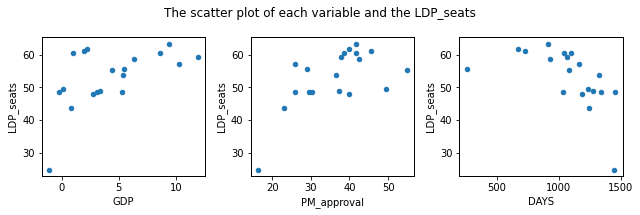

In [206]:
# Figure 1
show_x_y(orig_data)

In [207]:
acc_data

,Unnamed: 0,train_mae,train_mae_var,train_rmse,train_rmse_var,test_mae,test_mae_var,test_rmse,test_rmse_var,imp_Days_mean,imp_Days_std,imp_GDP_mean,imp_GDP_std,imp_approval_mean,imp_approval_std
0,lr,3.82,0.49,4.75,0.67,5.38,2.10,6.62,2.52,0.20,0.16,0.25,0.21,0.57,0.42
1,dt,2.11,0.63,2.77,0.76,4.84,2.12,6.07,2.95,1.63,1.17,0.00,0.00,0.00,0.00
2,rf,3.04,0.45,4.58,1.00,4.75,1.71,6.00,2.74,0.65,0.44,0.00,0.04,0.56,0.32
3,bag_lr,3.80,0.47,4.80,0.67,5.21,1.93,6.39,2.34,0.26,0.19,0.25,0.21,0.48,0.34
4,bag_dt,2.27,0.31,3.18,0.59,4.74,1.63,6.07,2.57,0.47,0.29,0.16,0.09,0.24,0.15
5,adaboost_lr,3.60,0.72,4.43,1.01,6.12,2.39,7.33,2.86,0.09,0.09,-0.07,0.05,1.14,0.50
6,adaboost_dt,1.28,0.75,2.25,1.03,5.47,2.37,7.39,3.80,1.00,0.75,-0.00,0.00,0.82,0.67
7,gradient_boost,1.57,0.52,4.44,1.60,4.67,1.61,5.92,2.45,0.61,0.37,0.32,0.25,0.04,0.11


<Figure size 432x288 with 0 Axes>

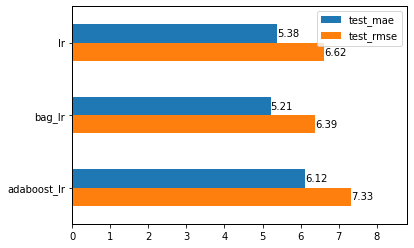

In [208]:
# Table 2 and figure 2 (Linear ensembled)
show_bar_el_lr(acc_data)

<Figure size 432x288 with 0 Axes>

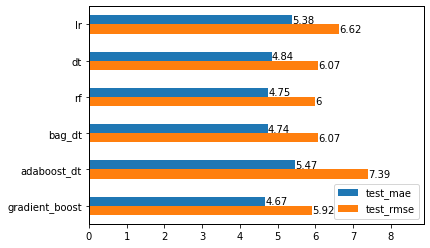

In [209]:
# Table 3 and figure 3 (Non linear ensembled)
show_bar_el_dt(acc_data)

<Figure size 432x288 with 0 Axes>

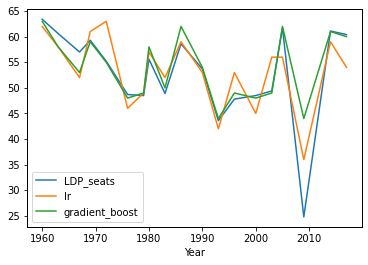

In [168]:
# Fig. 4 (Best non-linear ensemble, LBT, Ground)
shows_gd_pred(pred_data)

In [334]:
len(feats_import_dict["lr"][0])

30

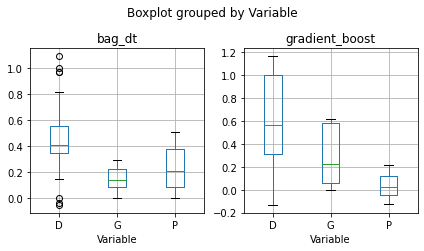

In [335]:
# Figure 5 (boxplot of feature imporantance)

feature_importance(feats_import_dict)